### Configuration

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch.nn as nn
from sklearn import datasets

### SKLearn Iris Data Loader and DataFrame Visualization

In [2]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### X,y data Generator...Feature and Label

In [3]:
X = iris.data
y = iris.target
print(X)
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

### Training, Test 데이타를 8:2로 비율로 섞고, random_state=42로 지정
    X_train, X_test, y_train, y_test 로 각각 할당된 값들을 torch 타입으로 변환 

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42) 
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train)
y_test = torch.from_numpy(y_test)

#### 하이퍼파라미터 지정

In [5]:
input_size = 4
hidden_size = 56
num_classes = 3
num_epochs = 100
learning_rate = 0.01

### NeuralNetwork  Model Definition

In [6]:
class NeuralNet(nn.Module): 
    def __init__(self, input_size, hidden_size, num_classes): 
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU() 
        self.fc2 = nn.Linear(hidden_size, num_classes) 
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out 

### NeuralNetwork  Model Excution , loss, optimizer, backward ..
    Forward Propagation and Baward Propagation

In [7]:
model = NeuralNet(input_size, hidden_size, num_classes)
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

graph = []

for epoch in range(num_epochs):
    for i, (features, labels) in enumerate(list(zip(X_train, y_train))):
        
        # Forward
        preds = model(features).reshape(1,3)
        labels = labels.reshape(1)
        loss = loss_function(preds, labels.long())

        # Backward
        optimizer.zero_grad() 
        loss.backward() 
        optimizer.step()

    if epoch % 10 == 0:
        print('epoch {}, Loss is {}'.format(epoch, loss.item()))
    
    graph.append(loss.item())

epoch 0, Loss is 1.067245602607727
epoch 10, Loss is 0.0019135475158691406
epoch 20, Loss is 0.002510547637939453
epoch 30, Loss is 0.0029163360595703125
epoch 40, Loss is 0.002842426300048828
epoch 50, Loss is 0.0029048919677734375
epoch 60, Loss is 0.003078460693359375
epoch 70, Loss is 0.003570556640625
epoch 80, Loss is 0.0034148693084716797
epoch 90, Loss is 0.002628803253173828


### Epoch(학습)에 따른 Loss감소를 시각화

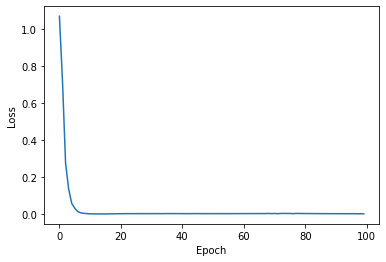

In [8]:
# Write Code !!
plt.plot(graph)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


### 학습을 통해서 Loss를 감소시켰다면 이제는Test를 해봅니다.
    테스트 할때는 학습의 의미가 없기때문에 Gradient Descent를 사용하지 않도록 합니다.
    그 결과로 컴퓨터 Performance를 높이는 결과를 가져옵니다.
    이때 우리가 테스트하는 데이타는 이미지가 아니고 단순 숫자 값으로 입력된다는 점을 잘 고려해야합니다.
    출력된 값 중에서 가장 높은 값의 인덱스가 바로 target의 라벨이 됩니다.
    
    예측한 값과 정답을 일일이 비교해서 출력하고
    총 30개의 Test 데이타 중에서 정확하게 맞춘 갯수를 최종적으로 출력합니다.

In [9]:
print("=================예측값 ,정답 출력==================")
with torch.no_grad():
    correct = 0
    total = 0
    cnt = 0
    for i, (features, labels) in enumerate(list(zip(X_train, y_train))):
        if i==30:
            break
    
        outputs = model(features).reshape(1,3)
        labels = labels.reshape(1).long()
        
        _,predicted = torch.max(outputs.data, 1)
        
        cnt += 1
        print(f'{cnt}) {predicted[0]} , {labels[0]}')
        
        total += labels.size(0)
        correct += (predicted==labels).sum() #내가 예측한 값과 일치한 값의 합
    print(f'{total}개의 Test 데이타 중에서 정답을 맞춘 갯수는 {correct} 개 입니다!!')
    print('정답률 : {} %'.format(100 * correct/total))

=================예측값 ,정답 출력==================
1) 0 , 0
2) 0 , 0
3) 1 , 1
4) 0 , 0
5) 0 , 0
6) 2 , 2
7) 1 , 1
8) 0 , 0
9) 0 , 0
10) 0 , 0
11) 2 , 2
12) 1 , 1
13) 1 , 1
14) 0 , 0
15) 0 , 0
16) 1 , 1
17) 2 , 2
18) 2 , 2
19) 1 , 1
20) 2 , 2
21) 1 , 1
22) 2 , 2
23) 1 , 1
24) 0 , 0
25) 2 , 2
26) 1 , 1
27) 0 , 0
28) 0 , 0
29) 0 , 0
30) 1 , 1
30개의 Test 데이타 중에서 정답을 맞춘 갯수는 30 개 입니다!!
정답률 : 100 %
